In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *
import matplotlib.animation as animation
import IPython

from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
def mu(x):
  if (x > 0):
    return 0
  else:
    return 1

In [ ]:
def mu_bell(x):
  return 0

In [ ]:
def phi(x):
  if(x < 1):
     return 1
  elif (x >= 1):
    return 0

In [ ]:
def phi_bell(x):
  if (0 < x < 1):
    return np.exp(-(x - 0.5)**2 / (0.25 - (x - 0.5)**2))
  else:
    return 0

In [ ]:
# tau = 0.1
h = 0.5
n = 20

a = 0.6
C = 0.5
l = 10
N = 15
# a = l / N
tau = C * h / a

x_ranges = int(l / h)
t_ranges = int(N / tau) - 1
x = np.array([0.0] * x_ranges)
t = [0] * t_ranges
t_range = np.array([0.0] * t_ranges)

In [ ]:
for i in range(x_ranges):
  x[i] = S(i * h).round(5)
  
for i in range(1, t_ranges):  
  t_range[i] = S(i * tau).round(5)
  t[i] = i

In [ ]:
u = np.array([[0.0] * x_ranges] * t_ranges)
u_analyt = np.array([[0.0] * x_ranges] * t_ranges)
u_cross = np.array([[0.0] * x_ranges] * t_ranges)

u_bell = np.array([[0.0] * x_ranges] * t_ranges)
u_analyt_bell = np.array([[0.0] * x_ranges] * t_ranges)
u_cross_bell = np.array([[0.0] * x_ranges] * t_ranges)

In [ ]:
u[0][0] = 1
u_analyt[0][0] = 1
u_cross[0][0] = 1

u_bell[0][0] = 0
u_analyt_bell[0][0] = 0
u_cross_bell[0][0] = 0

for i in range(t_ranges):
  if (i != 0):
    u[i][0] = 0 # гранич условия
    u_analyt[i][0] = 0
    u_cross[i][0] = 0

    u_bell[i][0] = 0 # гранич условия
    u_analyt_bell[i][0] = 0
    u_cross_bell[i][0] = 0

for i in range(x_ranges):
  if(x[i] < 1):
    u[0][i] = 1 # нач условия
    u_analyt[0][i] = 1
    u_cross[0][i] = 1
  elif (x[i] >= 1):
    u[0][i] = 0
    u_analyt[0][i] = 0
    u_cross[0][i] = 0

  u_bell[0][i] = phi_bell(x[i])
  u_analyt_bell[0][i] = phi_bell(x[i])
  u_cross_bell[0][i] = phi_bell(x[i])

In [ ]:
for i in range(1, t_ranges):
  for j in range(1, x_ranges):
    u[i][j] = u[i - 1][j] - C * (u[i - 1][j] - u[i - 1][j - 1])

    u_bell[i][j] = u_bell[i - 1][j] - C * (u_bell[i - 1][j] - u_bell[i - 1][j - 1])
    if (j < (x_ranges - 1)):
      u_cross[i][j] = u_cross[i - 1][j] - 0.5 * C * (u_cross[i - 1][j + 1] - u_cross[i - 1][j - 1])
      u_cross_bell[i][j] = u_cross_bell[i - 1][j] - 0.5 * C * (u_cross_bell[i - 1][j + 1] - u_cross_bell[i - 1][j - 1])
    # if(i < 10):
    #   print("i: ", i, ", j: ", j, ", u[i][j]: ", u[i][j])
  
# print(u[0][9])

In [ ]:
for i in range(1, t_ranges):
  for j in range(1, x_ranges):
    if (x[j] < a * t_range[i]):
      u_analyt[i][j] = mu(t_range[i] - x[j] / a)
      u_analyt_bell[i][j] = mu_bell(t_range[i] - x[j] / a)
    else:
      u_analyt[i][j] = phi(x[j] - a * t_range[i])
      u_analyt_bell[i][j] = phi_bell(x[j] - a * t_range[i])

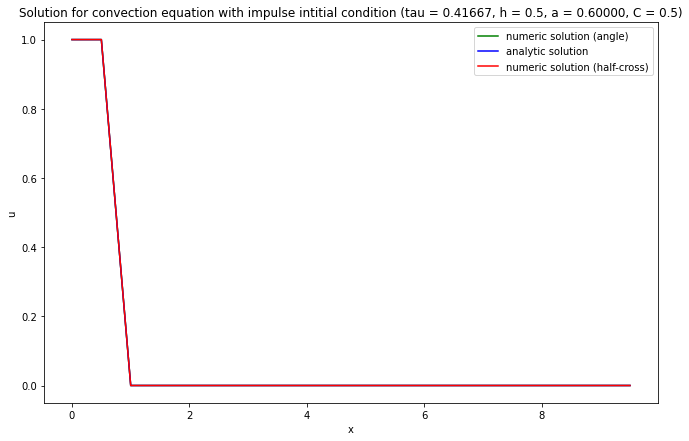

In [ ]:
fig, ax = plt.subplots(figsize = (11, 7))

line, = ax.plot(x, u[0])
line.set_color("green")
line.set_label("numeric solution (angle)")

line_analyt, = ax.plot(x, u_analyt[0])
line_analyt.set_color("blue")
line_analyt.set_label("analytic solution")

line_cross, = ax.plot(x, u_cross[0])
line_cross.set_color("red")
line_cross.set_label("numeric solution (half-cross)")

ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title(f"Solution for convection equation with impulse intitial condition (tau = {S(tau).round(5)}, h = {h}, a = {S(a).round(5)}, C = {C})")

hlegend = ax.legend()

def update_u(frame, line, line_analyt, line_cross, x):
  line.set_ydata(u[frame])
  line_analyt.set_ydata(u_analyt[frame])
  line_cross.set_ydata(u_cross[frame])
  htext = hlegend.get_texts()[0]
  return line, line_analyt, line_cross, htext

anim = animation.FuncAnimation(fig, update_u, frames = t, fargs = (line, line_analyt, line_cross, x), interval = 30, blit = False, repeat = False)
# plt.ioff()
IPython.display.display(anim)

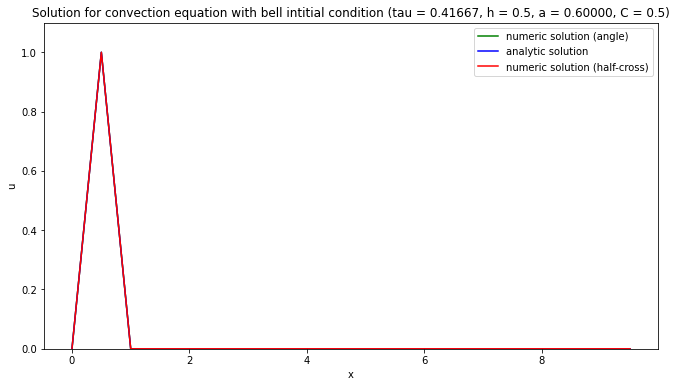

In [ ]:
fig, ax = plt.subplots(figsize = (11, 6))

line_bell, = ax.plot(x, u_bell[0])
line_bell.set_color("green")
line_bell.set_label("numeric solution (angle)")

line_analyt_bell, = ax.plot(x, u_analyt_bell[0])
line_analyt_bell.set_color("blue")
line_analyt_bell.set_label("analytic solution")
ax.set_ylim(0, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title(f"Solution for convection equation with bell intitial condition (tau = {S(tau).round(5)}, h = {h}, a = {S(a).round(5)}, C = {C})")


line_cross_bell, = ax.plot(x, u_cross_bell[0])
line_cross_bell.set_color("red")
line_cross_bell.set_label("numeric solution (half-cross)")

hlegend = ax.legend()

def update_u(frame, line_bell, line_analyt_bell, line_cross_bell, x):
  line_bell.set_ydata(u_bell[frame])
  line_analyt_bell.set_ydata(u_analyt_bell[frame])
  line_cross_bell.set_ydata(u_cross_bell[frame])
  htext = hlegend.get_texts()[0]
  return line_bell, line_analyt_bell, line_cross_bell, htext

anim = animation.FuncAnimation(fig, update_u, frames = t, fargs = (line_bell, line_analyt_bell, line_cross_bell, x), interval = 30, blit = False, repeat = False)
# plt.ioff()
IPython.display.display(anim)

In [ ]:
h_angle = np.array([[0.0] * x_ranges] * t_ranges)
h_max_angle = np.array([0.0] * t_ranges)

h_bell_angle = np.array([[0.0] * x_ranges] * t_ranges)
h_max_bell_angle = np.array([0.0] * t_ranges)

for i in range(t_ranges):
  for j in range(x_ranges):
    h_bell_angle[i][j] = abs(u_analyt[i][j] - u[i][j])
    h_angle[i][j] = abs(u_analyt[i][j] - u[i][j])

for i in range(t_ranges):
  h_max_angle[i] = max(h_angle[i])
  h_max_bell_angle[i] = max(h_bell_angle[i])

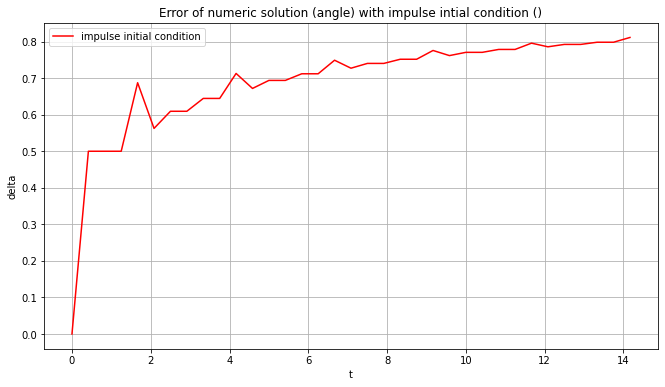

In [ ]:
fig, ax = plt.subplots(figsize = (11, 6))

ax.plot(t_range, h_max_angle, color = 'r', label = 'impulse initial condition')
ax.set_xlabel("t")
ax.set_ylabel("delta")
ax.legend()
ax.grid(True)
ax.set_title(f"Error of numeric solution (angle) with impulse intial condition ()")

plt.show()

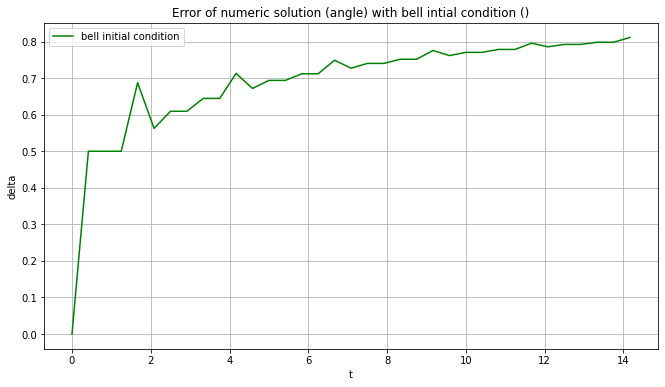

In [ ]:
fig, ax = plt.subplots(figsize = (11, 6))

ax.plot(t_range, h_max_bell_angle, color = 'g', label = 'bell initial condition')
ax.set_xlabel("t")
ax.set_ylabel("delta")
ax.legend()
ax.grid(True)

ax.set_title(f"Error of numeric solution (angle) with bell intial condition ()")

plt.show()

In [ ]:
h_range = np.array([0.0] * n)
for i in range(n):
  h_range[i] = 0.05 + i * 0.01
  # print(h_range[i])

In [ ]:
tau_arr = np.array([0.0] * n)
x_ranges_arr = np.array([0] * n)
t_ranges_arr = np.array([0] * n)

for k in range(n):
  x_arr = np.array([[0.0] * x_ranges_arr[k]] * n)
  t_arr = np.array([[0.0] * t_ranges_arr[k]] * n)
  t_range_arr = np.array([[0.0] * t_ranges_arr[k]] * n)

for i in range(n):
  tau_arr[i] = C * h_range[i] / a
  x_ranges_arr[i] = int(l / h_range[i])
  t_ranges_arr[i] = int(N / tau_arr[i]) - 1
  # x_arr[i] = 

for k in range(n):
  for i in range(x_ranges_arr[k]):
    x_arr[k][i] = S(i * h_range[k]).round(5)
    
  for i in range(1, t_ranges_arr[k]):  
    t_range_arr[k][i] = S(i * tau_arr[k]).round(5)
    t_arr[k][i] = i

# x_ranges = int(l / h)
# t_ranges = int(N / tau) - 1
# x = np.array([0.0] * x_ranges)
# t = [0] * t_ranges
# t_range = np.array([0.0] * t_ranges)

IndexError: ignored

In [ ]:
u_arr = np.array([[[0.0] * x_ranges] * t_ranges] * n)
u_analyt_arr = np.array([[[0.0] * x_ranges] * t_ranges] * n)
# u_cross_arr = np.array([[[0.0] * x_ranges] * t_ranges] * n)

u_bell_arr = np.array([[[0.0] * x_ranges] * t_ranges] * n)
u_analyt_bell_arr = np.array([[[0.0] * x_ranges] * t_ranges] * n)
# u_cross_bell_ = np.array([[[0.0] * x_ranges] * t_ranges] * n)

In [ ]:
for k in range(n):
  u_arr[k][0][0] = 1
  u_analyt_arr[k][0][0] = 1
  # u_cross[0][0] = 1

  u_bell_arr[k][0][0] = 0
  u_analyt_bell_arr[k][0][0] = 0
  # u_cross_bell[0][0] = 0

  for i in range(t_ranges_arr[k]):
    if (i != 0):
      u_arr[k][i][0] = 0 # гранич условия
      u_analyt_arr[k][i][0] = 0
      # u_cross[i][0] = 0

      u_bell_arr[k][i][0] = 0 # гранич условия
      u_analyt_bell_arr[k][i][0] = 0
      # u_cross_bell[i][0] = 0

  for i in range(x_ranges_arr[k]):
    if(x_arr[k][i] < 1):
      u_arr[k][0][i] = 1 # нач условия
      u_analyt_arr[k][0][i] = 1
      # u_cross[0][i] = 1
    elif (x_arr[k][i] >= 1):
      u_arr[k][0][i] = 0
      u_analyt_arr[k][0][i] = 0
      # u_cross[0][i] = 0

    u_bell[0][i][k] = phi_bell(x_arr[i][k])
    u_analyt_bell[0][i][k] = phi_bell(x_arr[i][k])
    # u_cross_bell[0][i] = phi_bell(x[i])

In [ ]:
for k in range(n):
  for i in range(1, t_ranges_arr[k]):
    for j in range(1, x_ranges_arr[k]):
      u_arr[k][i][j] = u_arr[k][i - 1][j] - C * (u_arr[k][i - 1][j] - u_arr[k][i - 1][j - 1])

      u_bell_arr[k][i][j] = u_bell_arr[k][i - 1][j] - C * (u_bell_arr[k][i - 1][j] - u_bell_arr[k][i - 1][j - 1])
      # if (j < (x_ranges - 1)):
      #   u_cross[i][j] = u_cross[i - 1][j] - 0.5 * C * (u_cross[i - 1][j + 1] - u_cross[i - 1][j - 1])
      #   u_cross_bell[i][j] = u_cross_bell[i - 1][j] - 0.5 * C * (u_cross_bell[i - 1][j + 1] - u_cross_bell[i - 1][j - 1])
      # if(i < 10):
      #   print("i: ", i, ", j: ", j, ", u[i][j]: ", u[i][j])
    
  # print(u[0][9])

In [ ]:
for k in range(k):
  for i in range(1, t_ranges_arr[k]):
    for j in range(1, x_ranges_arr[k]):
      if (x_arr[k][j] < a * t_range_arr[k][i]):
        u_analyt_arr[k][i][j] = mu(t_range_arr[k][i] - x_arr[k][j] / a)
        u_analyt_bell_arr[k][i][j] = mu_bell(t_range_arr[k][i] - x_arr[k][j] / a)
      else:
        u_analyt_arr[k][i][j] = phi(x_arr[k][j] - a * t_range_arr[k][i])
        u_analyt_bell_arr[k][i][j] = phi_bell(x_arr[k][j] - a * t_range_arr[k][i])

In [ ]:
h_angle_arr = np.array([[[0.0] * x_ranges] * t_ranges] * n)
h_max_angle_arr = np.array([[0.0] * t_ranges] * n)
h_ans_angle_arr = np.array([0.0] * n)

h_bell_angle_arr = np.array([[[0.0] * x_ranges] * t_ranges] * n)
h_max_bell_angle_arr = np.array([[0.0] * t_ranges] * n)
h_ans_bell_angle_arr = np.array([0.0] * n)

for k in range(n):
  for i in range(t_ranges_arr[k]):
    for j in range(x_ranges_arr[k]):
      h_bell_angle_arr[k][i][j] = abs(u_analyt_arr[k][i][j] - u_arr[k][i][j])
      h_angle_arr[k][i][j] = abs(u_analyt_arr[k][i][j] - u_arr[k][i][j])

  for i in range(t_ranges_arr[k]):
    h_max_angle_arr[k][i] = max(h_angle_arr[k][i])
    h_max_bell_angle_arr[k][i] = max(h_bell_angle_arr[k][i])

for k in range(n):
  h_ans_angle_arr[k] = max(h_max_angle_arr[k])
  h_ans_bell_angle_arr[k] = max(h_max_bell_angle_arr[k])